In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [15]:
source_folder = r"D:\Downloads\Archive\2023-10-30 2hpi_fli1 fish_8_Michellevid"
data_src = r"\Brightfield - Prosilica\*tif"
data_src = source_folder + data_src

oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.skip_frames = 100
oog.sequence_manager.max_frames = 400
oog.run()

Setting source to D:\Downloads\Archive\2023-10-30 2hpi_fli1 fish_8_Michellevid\Brightfield - Prosilica\*tif
Getting reference sequence
100 1 0 1000
Reference period: 15.449068373923286; Reference indices: [16, 38]
100 1 0 1000
Getting SADs
Getting phases


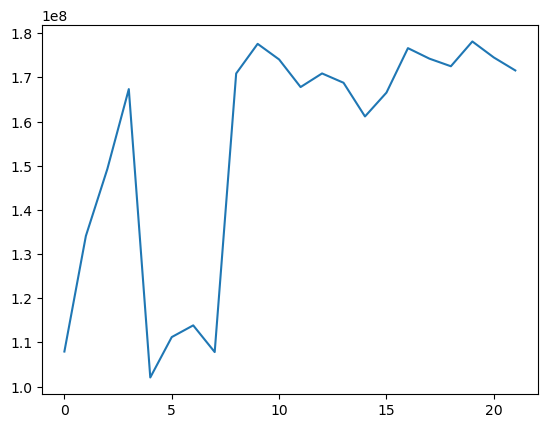

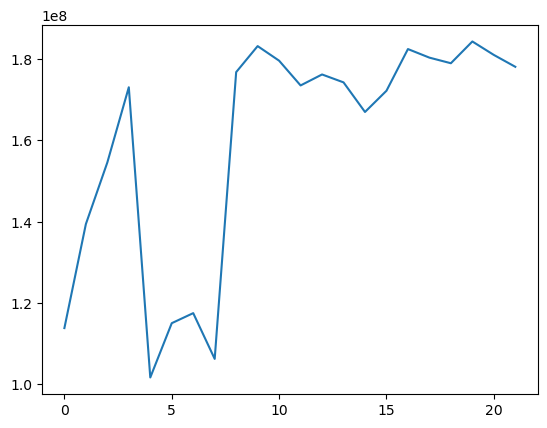

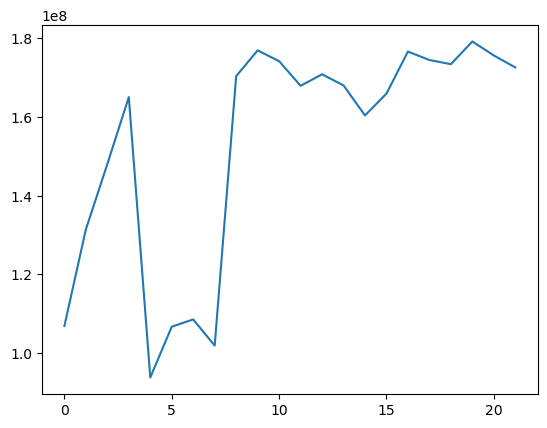

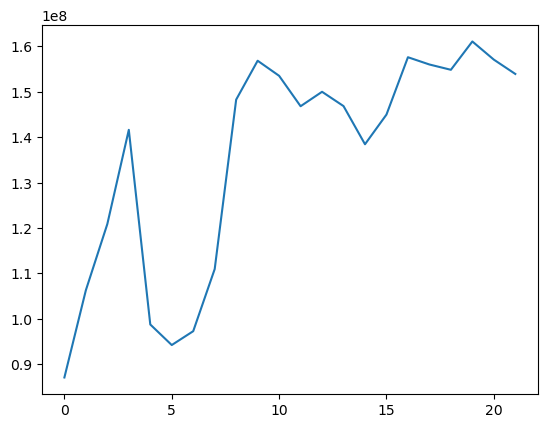

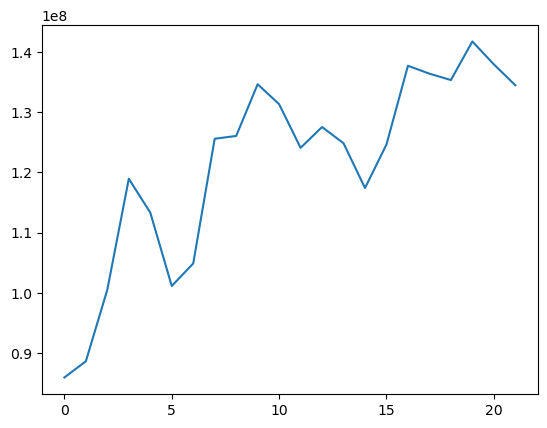

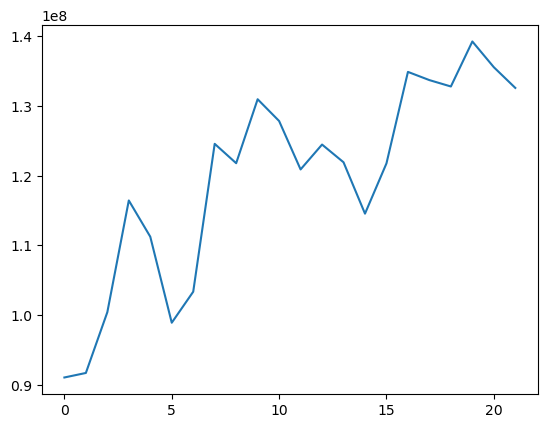

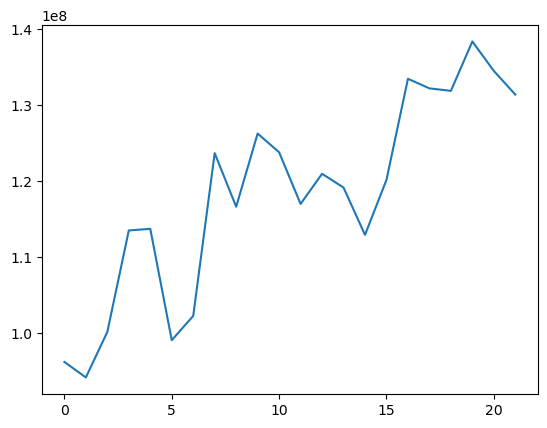

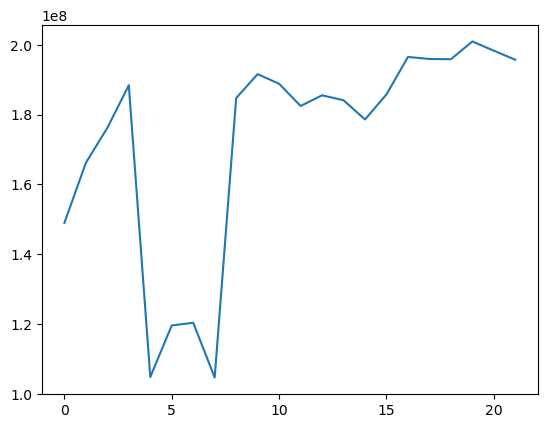

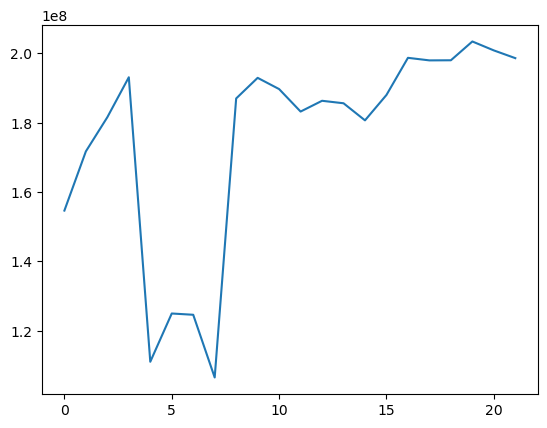

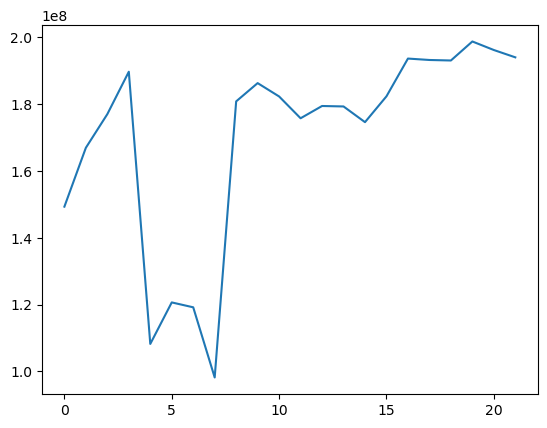

In [21]:
#plt.plot(oog.phases)

for i in range(50, 60):
    plt.figure()
    plt.plot(oog.sads[i])
    plt.show()

In [2]:
def get_diagonal_ordered(source_folder, data_src, frame_rate, ordered = True):
    # Run OOG
    data_src = source_folder + data_src
    oog = OG.BasicOpticalGating()
    oog.sequence_manager.set_source(data_src)
    oog.sequence_manager.skip_frames = 100
    oog.sequence_manager.max_frames = 400
    oog.run()

    # Sort phases
    if ordered == True:
        order = np.argsort(oog.phases)
    else:
        order = np.arange(len(oog.phases))

    # Get video for comparisons
    video_array = OG.SequenceManager.load_tif(data_src)[order]

    # Apply drift correction
    drifts = np.array(oog.drifts)[order]
    crop_x = np.max(np.abs(drifts))
    crop_y = np.max(np.abs(drifts))
    video_array_cropped = np.empty((video_array.shape[0], video_array.shape[1] - 2 * crop_x, video_array.shape[2] - 2 * crop_y), dtype = np.uint16)
    for i, drift in enumerate(drifts):
        dx, dy = drift
        rectF = [crop_x - dx, video_array[0].shape[0] - crop_x - dx, crop_y - dy, video_array[0].shape[1] - crop_y - dy]  # X1,X2,Y1,Y2
        video_array_cropped[i] = video_array[i][rectF[0] : rectF[1], rectF[2] : rectF[3]]

    # Get diffs array
    diffs_array = []
    va = video_array_cropped.astype(np.uint16)
    for i in range(va.shape[0]):
        diffs_array.append(jps.sad_with_references(va[i], va))
    diffs_array = np.array(diffs_array)
    #diffs_array = np.delete(diffs_array,range(0,diffs_array.shape[0]**2,(diffs_array.shape[0]+1))).reshape(diffs_array.shape[0],(diffs_array.shape[1]-1))

    # And plot
    plt.figure(figsize = (20,20))
    plt.imshow(diffs_array, interpolation="none")
    plt.axvline(oog.sequence_manager.reference_indices[0], c = "crimson", lw = 1)
    plt.axvline(oog.sequence_manager.reference_indices[1], c = "crimson", lw = 1)
    plt.show()

    return video_array_cropped

In [3]:
#get_diagonal_ordered(r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane", r"\brightfield\*tif", 80)

Setting source to D:\Downloads\Archive\2023-10-30 2hpi_fli1 fish_8_Michellevid\Brightfield - Prosilica\*tif
Getting reference sequence
100 1 0 1000
Reference period: 15.449068373923286; Reference indices: [16, 38]
100 1 0 1000
Getting SADs
Getting phases


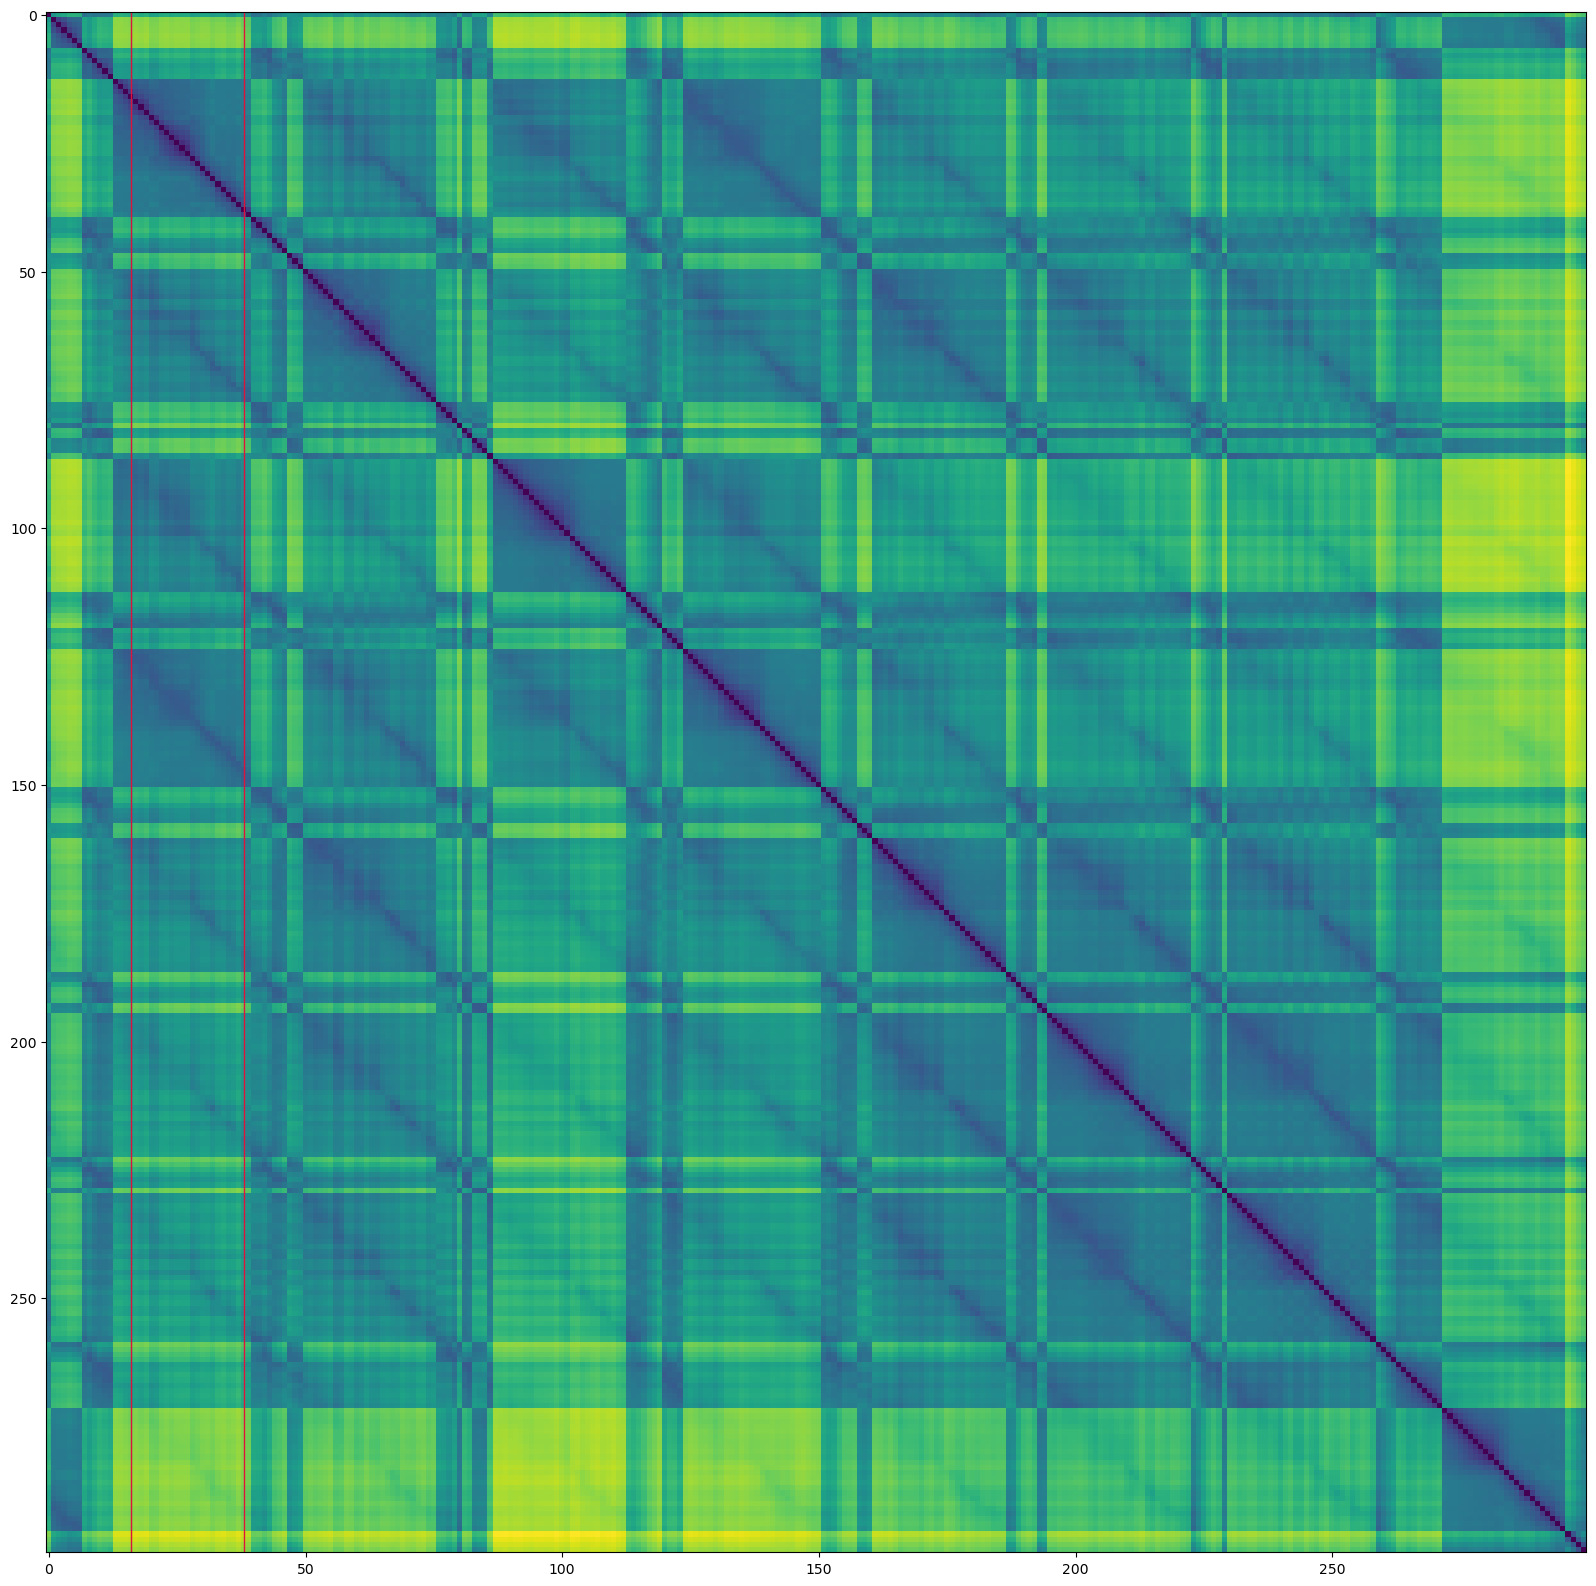

array([[[ 8223,  9231,  9455, ...,  5087,  4879,  4415],
        [ 7871,  7647,  6991, ...,  5215,  4783,  5103],
        [ 8127,  7439,  8495, ...,  4959,  4911,  5199],
        ...,
        [28847, 28943, 28239, ..., 24335, 24527, 24655],
        [28591, 27775, 28303, ..., 24015, 25055, 23775],
        [28831, 28415, 27839, ..., 24511, 24255, 23631]],

       [[ 7887,  7503,  6959, ...,  4991,  4927,  4671],
        [ 8495,  7391,  8767, ...,  5103,  4975,  5231],
        [ 8639, 10031, 12143, ...,  5039,  5423,  4911],
        ...,
        [28399, 28127, 28511, ..., 25103, 23791, 23727],
        [28735, 28079, 28255, ..., 24415, 24495, 23663],
        [27311, 27807, 28431, ..., 23791, 23567, 23951]],

       [[ 7535,  7631,  7167, ...,  5007,  4767,  5055],
        [ 8815,  7535,  9039, ...,  4911,  4991,  4831],
        [ 8831, 10447, 12095, ...,  5007,  5263,  4831],
        ...,
        [28047, 28911, 27743, ..., 24399, 24063, 24047],
        [28095, 28319, 27919, ..., 24927, 249

In [4]:
get_diagonal_ordered(r"D:\Downloads\Archive\2023-10-30 2hpi_fli1 fish_8_Michellevid", r"\Brightfield - Prosilica\*tif", 80, False)

Setting source to D:\Downloads\Archive\2023-10-30 2hpi_fli1 fish_8_Michellevid\Brightfield - Prosilica\*tif
Getting reference sequence
100 1 0 1000
Reference period: 15.449068373923286; Reference indices: [16, 38]
100 1 0 1000
Getting SADs
Getting phases


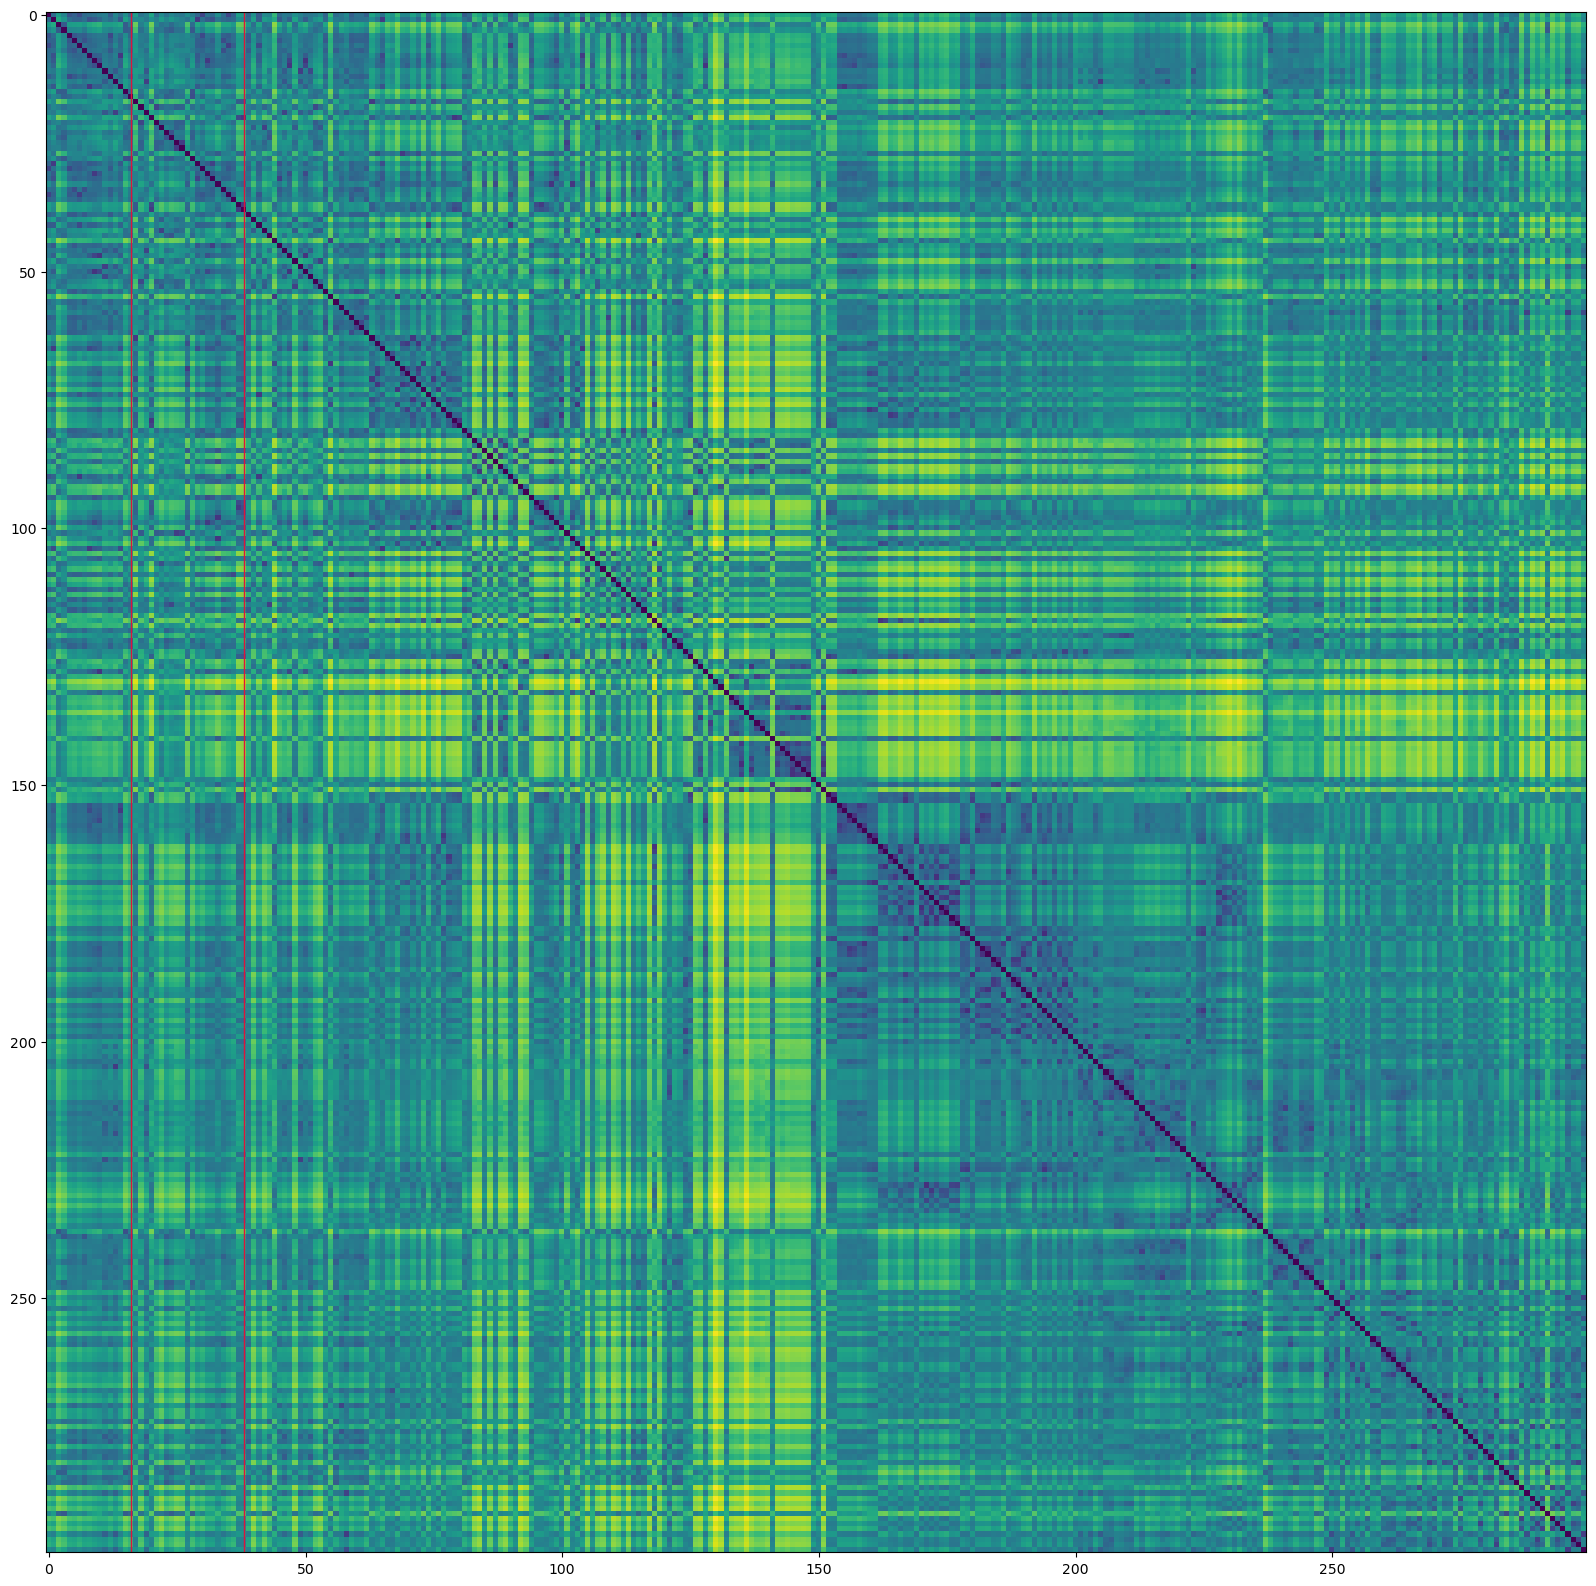

array([[[ 8399,  9839,  9263, ...,  4799,  4991,  5151],
        [ 7775,  8367,  7535, ...,  5503,  4623,  4639],
        [ 8287,  7695,  8383, ...,  4863,  5023,  4767],
        ...,
        [28943, 29231, 28479, ..., 25231, 24959, 25295],
        [28687, 28575, 28687, ..., 24111, 24591, 23983],
        [28495, 28783, 27695, ..., 24559, 24687, 24111]],

       [[ 9343,  8783,  8911, ...,  4719,  4751,  4799],
        [ 8015,  8511,  6415, ...,  5199,  4895,  4815],
        [ 7375,  7503,  8015, ...,  5007,  4975,  4927],
        ...,
        [29247, 28927, 28639, ..., 24943, 25631, 25343],
        [29167, 28431, 28367, ..., 24511, 24831, 24255],
        [28783, 27887, 28303, ..., 24447, 24511, 23823]],

       [[ 8767,  8175,  7023, ...,  5439,  5151,  5039],
        [ 8303,  8335,  8239, ...,  5247,  4959,  4783],
        [ 7743, 10207, 12735, ...,  4911,  4975,  4895],
        ...,
        [28239, 29295, 28255, ..., 25071, 23967, 24847],
        [28879, 27887, 28591, ..., 24639, 246

In [5]:
get_diagonal_ordered(r"D:\Downloads\Archive\2023-10-30 2hpi_fli1 fish_8_Michellevid", r"\Brightfield - Prosilica\*tif", 80)

Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\2024-01-19 17.36.03 vid\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
100 1 0 1000
Reference period: 60.16183127572016; Reference indices: [18, 85]
100 1 0 1000
Getting SADs
Getting phases


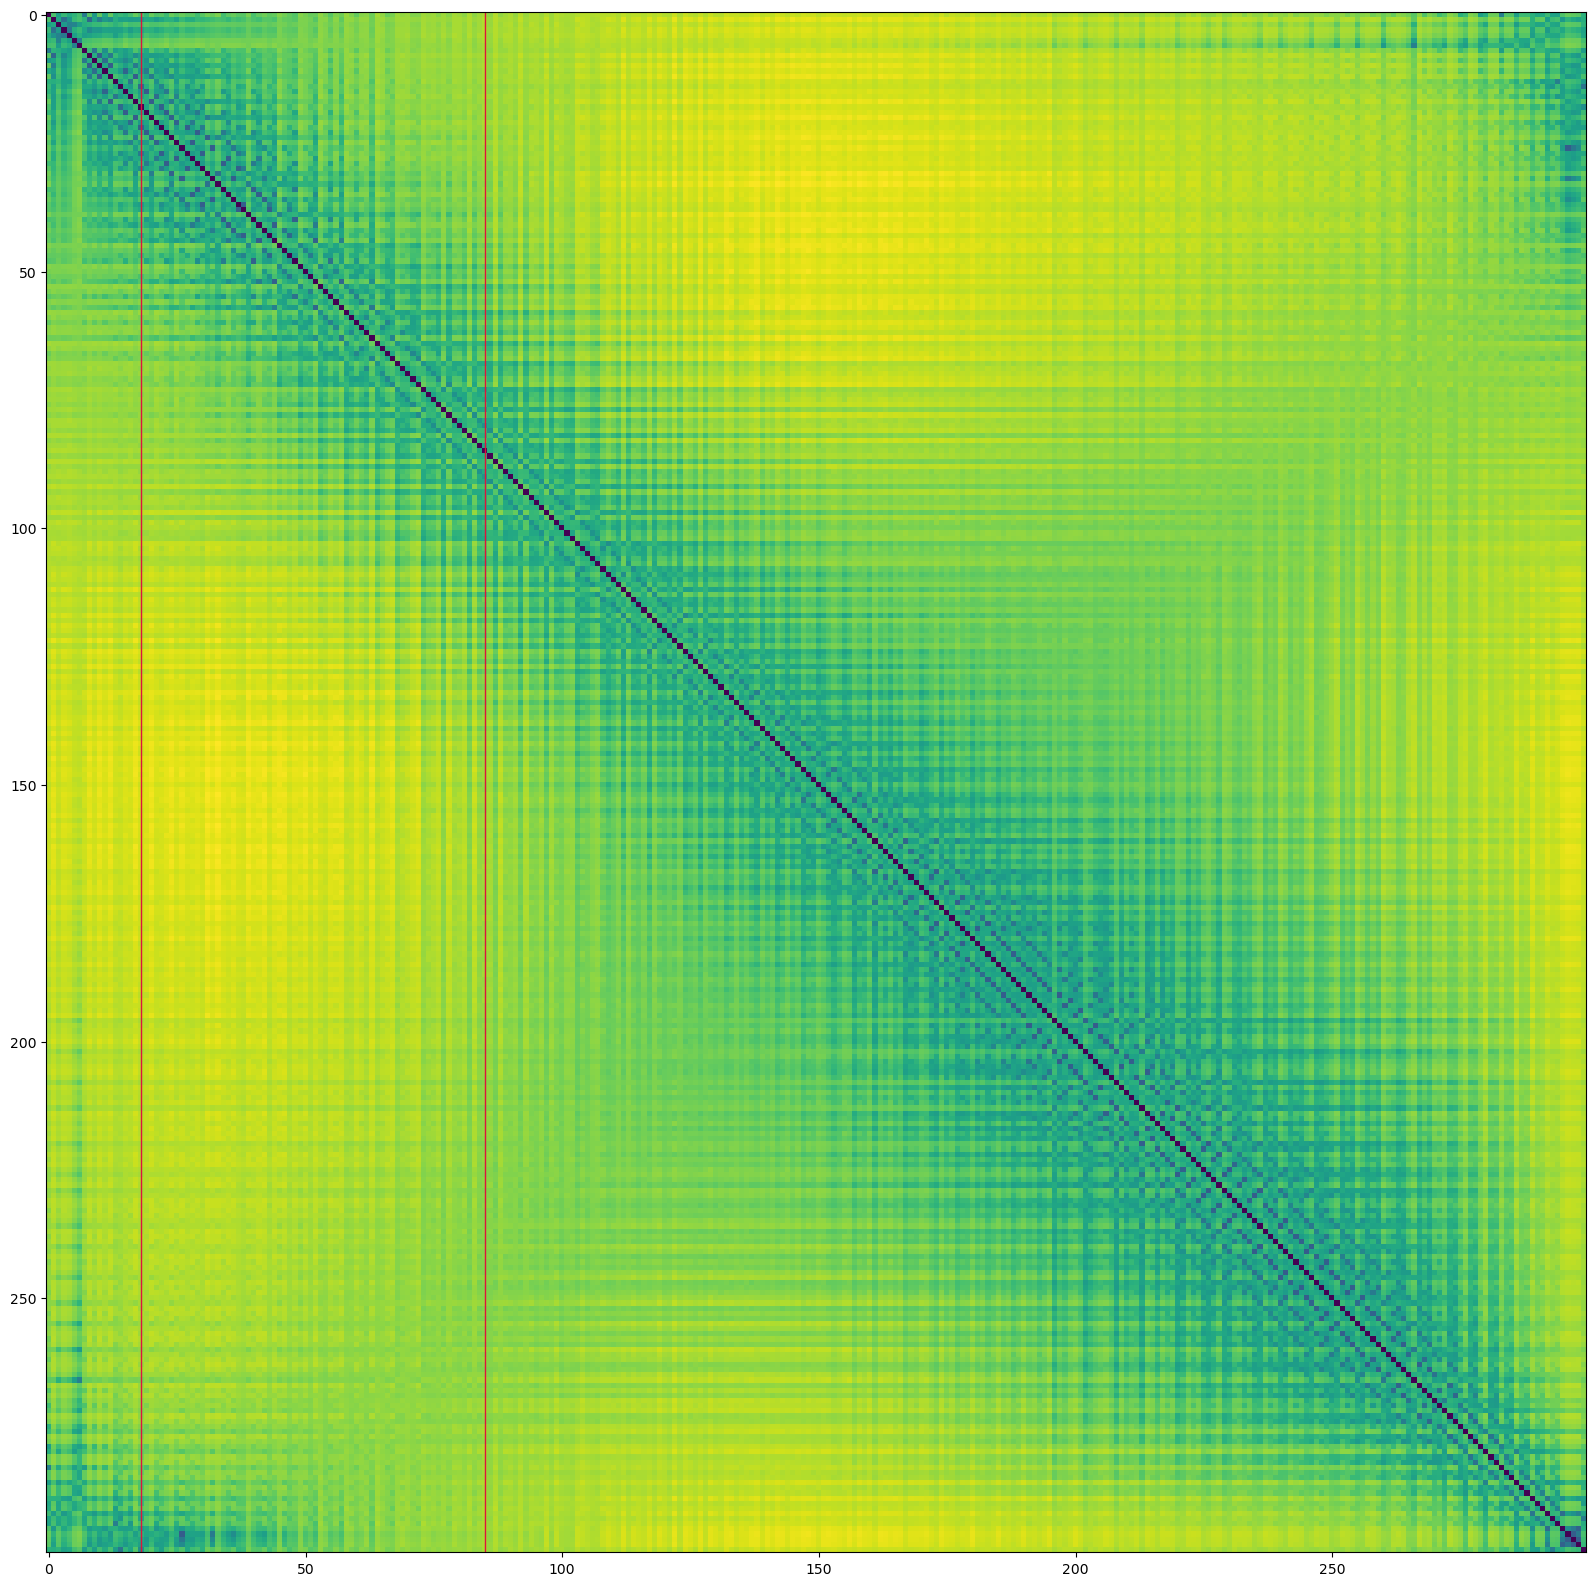

array([[[19, 21, 24, ..., 42, 42, 41],
        [18, 18, 20, ..., 44, 41, 43],
        [18, 16, 19, ..., 36, 39, 42],
        ...,
        [53, 52, 52, ..., 37, 37, 31],
        [53, 51, 53, ..., 38, 37, 29],
        [51, 51, 52, ..., 40, 35, 32]],

       [[21, 22, 27, ..., 39, 40, 45],
        [21, 23, 26, ..., 39, 42, 47],
        [23, 26, 29, ..., 34, 40, 41],
        ...,
        [51, 52, 51, ..., 36, 37, 30],
        [51, 50, 52, ..., 39, 37, 30],
        [52, 52, 51, ..., 39, 36, 32]],

       [[20, 22, 26, ..., 43, 38, 43],
        [21, 19, 24, ..., 40, 38, 43],
        [22, 23, 26, ..., 34, 38, 41],
        ...,
        [53, 52, 51, ..., 36, 37, 30],
        [51, 53, 53, ..., 37, 37, 30],
        [52, 52, 53, ..., 41, 35, 33]],

       ...,

       [[26, 29, 32, ..., 39, 37, 45],
        [25, 27, 28, ..., 39, 39, 44],
        [24, 25, 25, ..., 33, 38, 45],
        ...,
        [52, 51, 51, ..., 38, 38, 31],
        [52, 53, 52, ..., 39, 35, 29],
        [53, 51, 50, ..., 38, 34

In [7]:
get_diagonal_ordered(r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\2024-01-19 17.36.03 vid", r"\Allied Vision Technologies GS650 0001f61c\*tif", 120, True)